In [1]:
import requests
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)


# 데이터 전처리

In [2]:
import string
import re
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('', '', text)
    return text
remove_punct("wow!!!")

'wow'

### 가격(day_price)

In [3]:
colname=['year','day','price']
df_2010 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/농산물 유통정보/붉은고추/가격/df_2010.csv", names=colname)
df_2011 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/농산물 유통정보/붉은고추/가격/df_2011.csv", names=colname)
df_2012 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/농산물 유통정보/붉은고추/가격/df_2012.csv", names=colname)
df_2013 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/농산물 유통정보/붉은고추/가격/df_2013.csv", names=colname)
df_2014 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/농산물 유통정보/붉은고추/가격/df_2014.csv", names=colname)
df_2015 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/농산물 유통정보/붉은고추/가격/df_2015.csv", names=colname)
df_2016 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/농산물 유통정보/붉은고추/가격/df_2016.csv", names=colname)
df_2017 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/농산물 유통정보/붉은고추/가격/df_2017.csv", names=colname)
df_2018 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/농산물 유통정보/붉은고추/가격/df_2018.csv", names=colname)
df_2019 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/농산물 유통정보/붉은고추/가격/df_2019.csv", names=colname)
df_2020 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/농산물 유통정보/붉은고추/가격/df_2020.csv", names=colname)

In [5]:
day_price = pd.concat([df_2010,df_2011,df_2012,df_2013,df_2014,df_2015,df_2016,df_2017,df_2018,df_2019,df_2020])

In [6]:
day_price = day_price.astype(str)
day_price['month'] = day_price.day.str.extract("(\d{2})/", expand=True)
day_price['day'] = day_price.day.str.extract("/(\d{2})", expand=True)
day_price['year'] =day_price['year'].astype(str)
day_price['date'] = day_price['year']+day_price['month']+day_price['day']

day_price['price'] = day_price['price'].apply(lambda x: remove_punct(x))

day_price = day_price[['year','month','day','date','price']]
#df['date'] = pd.to_datetime(df['date'])
day_price['price'] = day_price['price'].astype(int)

In [7]:
day_price.head(3)

,year,month,day,date,price
0,2010,01,04,20100104,1284
1,2010,01,05,20100105,1292
2,2010,01,06,20100106,1305


In [8]:
day_price.isna().sum()

year     0
month    0
day      0
date     0
price    0
dtype: int64

### 날씨(temp)

In [12]:
df_2010 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/기상data/df_2010.csv", encoding='ansi')
df_2011 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/기상data/df_2011.csv", encoding='ansi')
df_2012 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/기상data/df_2012.csv", encoding='ansi')
df_2013 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/기상data/df_2013.csv", encoding='ansi')
df_2014 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/기상data/df_2014.csv", encoding='ansi')
df_2015 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/기상data/df_2015.csv", encoding='ansi')
df_2016 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/기상data/df_2016.csv", encoding='ansi')
df_2017 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/기상data/df_2017.csv", encoding='ansi') 
df_2018 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/기상data/df_2018.csv", encoding='ansi') 
df_2019 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/기상data/df_2019.csv", encoding='ansi') 
df_2020 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/기상data/df_2020.csv", encoding='ansi')

In [13]:
df = pd.concat([df_2010,df_2011,df_2012,df_2013,df_2014,df_2015,df_2016,df_2017,df_2018,df_2019,df_2020])

In [14]:
temp = df[df['지점명']=='안동']

In [15]:
temp.isna().sum()

지점                  0
지점명                 0
일시                  0
평균기온(°C)            0
최저기온(°C)            0
최고기온(°C)            0
일강수량(mm)         2612
최대 순간 풍속(m/s)       0
최대 풍속(m/s)          0
평균 풍속(m/s)          0
평균 상대습도(%)          0
합계 일조시간(hr)         6
합계 일사량(MJ/m2)       3
평균 전운량(1/10)        0
dtype: int64

In [16]:
temp = temp.replace({'일강수량(mm)':0}=={'일강수량(mm)':0.01})

In [17]:
temp['일강수량(mm)'] = temp['일강수량(mm)'].fillna(0)

In [18]:
temp = temp.dropna()

### 공급량(supply_data)

In [25]:
df_2010 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/농산물 유통정보/붉은고추/공급/df_2010.csv", encoding='utf-8')
df_2011 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/농산물 유통정보/붉은고추/공급/df_2011.csv", encoding='utf-8')
df_2012 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/농산물 유통정보/붉은고추/공급/df_2012.csv", encoding='utf-8')
df_2013 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/농산물 유통정보/붉은고추/공급/df_2013.csv", encoding='utf-8')
df_2014 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/농산물 유통정보/붉은고추/공급/df_2014.csv", encoding='utf-8')
df_2015 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/농산물 유통정보/붉은고추/공급/df_2015.csv", encoding='utf-8')
df_2016 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/농산물 유통정보/붉은고추/공급/df_2016.csv", encoding='utf-8')
df_2017 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/농산물 유통정보/붉은고추/공급/df_2017.csv", encoding='utf-8')
df_2018 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/농산물 유통정보/붉은고추/공급/df_2018.csv", encoding='utf-8')
df_2019 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/농산물 유통정보/붉은고추/공급/df_2019.csv", encoding='utf-8')
df_2020 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/농산물 유통정보/붉은고추/공급/df_2020.csv", encoding='utf-8')

In [26]:
supply_data = pd.concat([df_2010,df_2011,df_2012,df_2013,df_2014,df_2015,df_2016,df_2017,df_2018,df_2019,df_2020])

### 생산량(output_data)

In [28]:
output_data = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/농산물 유통정보/붉은고추/생산량.csv", encoding='ansi')


In [29]:
output_data = output_data.rename(index = output_data["시도별"])
del output_data["시도별"]

In [30]:
output_data = output_data*1000

In [31]:
output_data

,계,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주도
2019,254280386.6,19848.91,224718.97,230443.87,828301.74,6076242.05,244987.23,479745.85,367105.53,10739429.00,37163699.33,8521828.00,12027531.15,22696207.56,25191722.00,24318703.34,1.049746e+08,175242.44
2018,265254376.4,29135.88,274096.76,305818.62,1079377.09,8974641.22,312573.07,443415.50,670617.07,8695437.29,33335022.63,8037509.79,14149929.97,15584390.51,24333441.75,20928539.41,1.272252e+08,875212.86
2017,241946151.0,21150.32,387451.61,845620.09,688837.51,5169593.05,195065.72,377728.12,217946.64,8729142.67,33875620.16,4807711.05,15529271.49,14405480.39,26182051.69,17501751.75,1.120536e+08,958079.53
2016,254657840.0,17840.00,516000.00,258000.00,885000.00,6464000.00,298000.00,530000.00,452000.00,13282000.00,39967000.00,9826000.00,18430000.00,17304000.00,32945000.00,26837000.00,8.626700e+07,379000.00
2015,273270820.0,61637.81,386024.15,1025256.85,1520202.28,11645102.52,302822.55,507140.22,0.00,15955318.28,33981956.54,10039080.03,28402097.09,20356589.07,39700056.98,28770890.97,8.008762e+07,529026.65
2014,270982832.0,1229777.84,111685.19,716460.72,1426252.89,10166363.38,423923.13,571620.86,0.00,14507358.18,32601295.71,9663745.50,29133877.38,14161056.07,36397990.13,24486754.43,9.532670e+07,57973.68
2013,298884807.6,440342.29,316348.58,1332919.44,1476752.99,18187217.06,867467.18,649263.86,0.00,16969922.84,39686888.78,12603170.48,26220697.00,16310253.09,41868842.20,40727728.20,8.103752e+07,189474.22
2012,302014761.3,238956.26,345529.55,572198.08,2453545.00,11327314.84,448834.14,474331.52,0.00,17764636.70,38797346.04,11701654.75,26051645.77,14080354.08,42095384.53,40083508.56,9.546638e+07,113138.01
2011,262256823.9,67302.78,122978.58,831257.03,986022.91,15159693.12,481600.24,394820.49,0.00,16896547.99,28535439.47,6883457.60,20861146.96,17170876.27,34932710.59,32136139.70,8.672191e+07,74924.49
2010,310462000.0,114000.00,178283.48,1423689.24,1921323.76,20312386.54,503820.65,403111.65,0.00,14274247.04,37331866.56,11985955.77,24035937.23,16427120.71,46662686.03,37735059.33,9.704866e+07,104585.63


### 수출수입량(export_data)

In [32]:
colname=['year','month','수출(중량)','수출(금액)','수입(중량)','수입(금액)']
export_data = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/농산물 유통정보/붉은고추/수입수출.csv", encoding='ansi', names=colname)


# 데이터 EDA

### 생산량 가장 많은 연도와 지역

In [30]:
use_data = output_data.copy()

C:\Users\kyy80\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kyy80\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0, flags=flags)


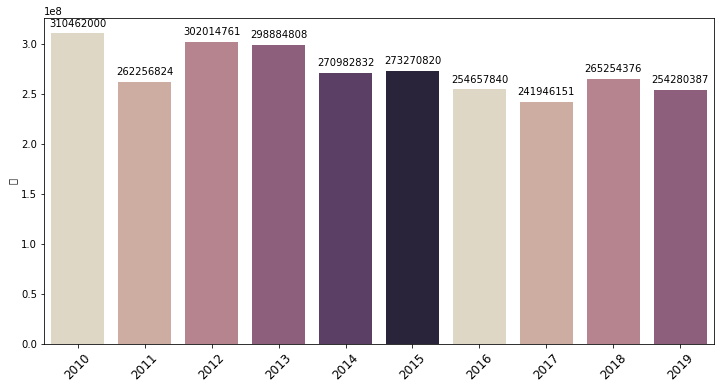

In [31]:
#barchart_data = use_data.sum(axis=1).sort_values(ascending = False)
#barchart_data = pd.DataFrame(barchart_data, columns = ["sum"])
#barchart_data = barchart_data.astype(int)

plt.figure(figsize=(12,6))
palette = sns.color_palette("ch:s=-.2,r=.6")

g = sns.barplot(data=use_data, x=use_data.index, y="계", palette=palette)
ax = g
#annotate axis = seaborn axis 
for p in ax.patches: 
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30), 
       ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), 
       textcoords='offset points') 
plt.xticks(fontsize=12, rotation=45)
plt.show()

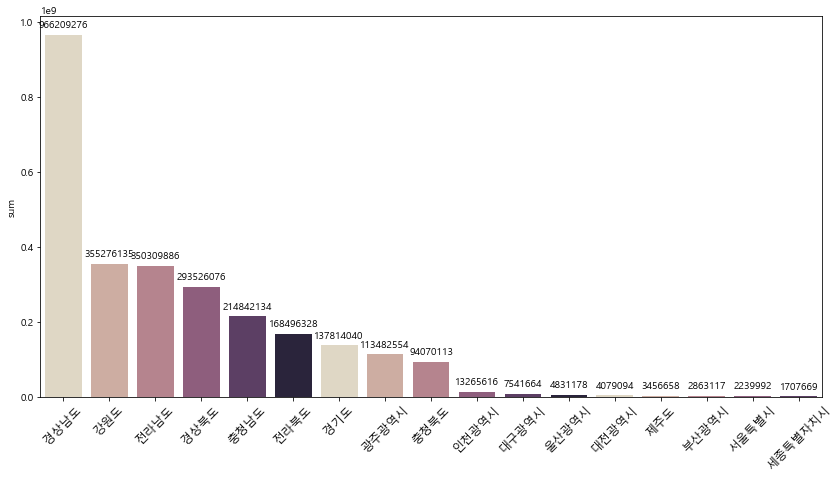

In [32]:
barchart_data = use_data.sum(axis=0).sort_values(ascending = False)
barchart_data = pd.DataFrame(barchart_data, columns = ["sum"])

plt.figure(figsize=(14,7))
palette = sns.color_palette("ch:s=-.2,r=.6")

g = sns.barplot(data=barchart_data[1:], x=barchart_data[1:].index, y="sum", palette=palette)
ax = g
#annotate axis = seaborn axis 
for p in ax.patches: 
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30), 
       ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), 
       textcoords='offset points') 
plt.xticks(fontsize=12, rotation=45)
plt.show()

### 평균 유통 가격

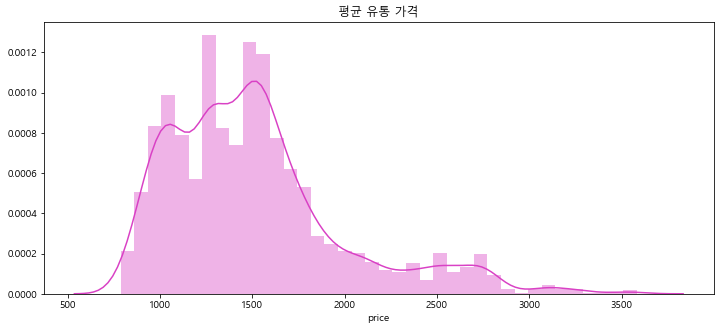

In [33]:
plt.figure(figsize=(12,5))
plt.title("평균 유통 가격")
ax = sns.distplot(day_price["price"], color = '#D941C5')

### 날씨와 생산량의 상관관계

In [34]:
use_temp = temp.copy()

use_temp['일시'] = use_temp['일시']+','
use_temp['year'] = use_temp["일시"].str.extract("(\d{4})-", expand=True)
use_temp['month'] = use_temp["일시"].str.extract("-(\d{2})-", expand=True)
use_temp['day'] = use_temp["일시"].str.extract("-(\d{2}),", expand=True)
use_temp['date'] = use_temp['year']+use_temp['month']+use_temp['day']

use_temp['date'] = use_temp['date'].astype(str)

del use_temp["지점명"]
del use_temp["지점"]
use_temp = use_temp.groupby(['year','month'], as_index=False).mean()

#생산량 데이터
use_output = output_data.copy()
use_output['year'] = use_output.index
use_output = use_output.iloc[:,-3:]
del use_output['제주도']

#int 타입으로
use_output = use_output.astype(int)
use_temp = use_temp.astype(int)

#합치기
temp_output = pd.merge(use_temp, use_output, how = 'left', on = 'year')
temp_output = temp_output.rename(columns = {'price':'avgPrice'})
temp_output = temp_output.rename(columns = {'경상남도':'생산량'})

In [35]:
temp_output.isna().sum()

year              0
month             0
평균기온(°C)          0
최저기온(°C)          0
최고기온(°C)          0
일강수량(mm)          0
최대 순간 풍속(m/s)     0
최대 풍속(m/s)        0
평균 풍속(m/s)        0
평균 상대습도(%)        0
합계 일조시간(hr)       0
합계 일사량(MJ/m2)     0
평균 전운량(1/10)      0
생산량              11
dtype: int64

In [36]:
temp_output = temp_output.dropna()

In [37]:
temp_output

,year,month,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),최대 풍속(m/s),평균 풍속(m/s),평균 상대습도(%),합계 일조시간(hr),합계 일사량(MJ/m2),평균 전운량(1/10),생산량
0,2010,1,-3,-9,2,0,7,4,1,61,7,10,3,97048656.0
1,2010,2,1,-3,6,2,7,4,1,63,7,10,5,97048656.0
2,2010,3,4,0,9,2,8,4,2,64,6,11,6,97048656.0
3,2010,4,9,3,16,1,9,5,2,55,6,17,5,97048656.0
4,2010,5,17,10,24,3,8,4,1,61,7,19,4,97048656.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2019,8,25,21,30,4,6,3,1,75,7,18,5,104974629.0
116,2019,9,21,17,26,7,6,3,1,78,4,13,7,104974629.0
117,2019,10,14,9,20,4,6,3,1,75,7,12,5,104974629.0
118,2019,11,7,1,14,1,6,3,1,71,6,9,5,104974629.0


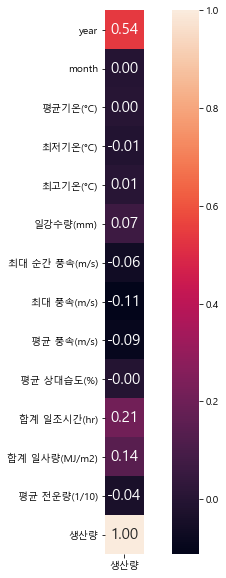

In [38]:
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

cols = ['year','month','평균기온(°C)','최저기온(°C)','최고기온(°C)','일강수량(mm)','최대 순간 풍속(m/s)','최대 풍속(m/s)','평균 풍속(m/s)','평균 상대습도(%)','합계 일조시간(hr)','합계 일사량(MJ/m2)','평균 전운량(1/10)','생산량']
cm = pd.DataFrame(temp_output.corr(method = 'pearson')['생산량'])
plt.figure(figsize=(10,10))
#sns.set(font_scale = 1.7)
hm = sns.heatmap(cm,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols)

#### 6월-가뭄 고온

In [311]:
temp_output_hot = temp_output[temp_output['month'].isin(['06'])]
heat_data = pd.DataFrame(temp_output_hot.corr(method = 'pearson')['생산량'])

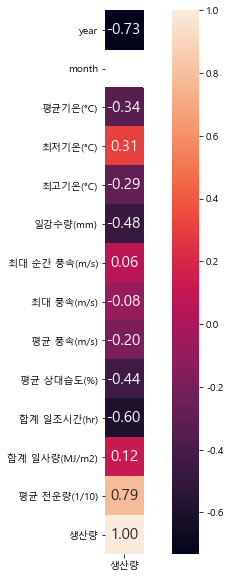

In [312]:
cols = ['year', 'month','평균기온(°C)','최저기온(°C)','최고기온(°C)','일강수량(mm)','최대 순간 풍속(m/s)','최대 풍속(m/s)','평균 풍속(m/s)','평균 상대습도(%)','합계 일조시간(hr)','합계 일사량(MJ/m2)','평균 전운량(1/10)','생산량']
plt.figure(figsize=(10,10))
hm = sns.heatmap(heat_data,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols)

### 7,8,9월 - 장마, 태풍

In [313]:
temp_output_rain = temp_output[temp_output['month'].isin(['07','08','09'])]
heat_data = pd.DataFrame(temp_output_rain.corr(method = 'pearson')['생산량'])

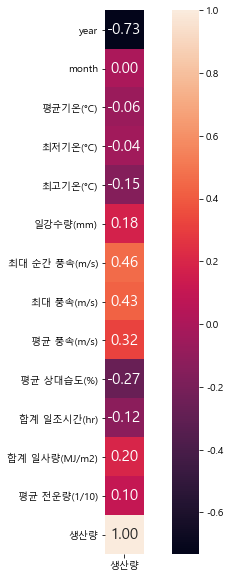

In [314]:
cols = ['year', 'month','평균기온(°C)','최저기온(°C)','최고기온(°C)','일강수량(mm)','최대 순간 풍속(m/s)','최대 풍속(m/s)','평균 풍속(m/s)','평균 상대습도(%)','합계 일조시간(hr)','합계 일사량(MJ/m2)','평균 전운량(1/10)','생산량']
plt.figure(figsize=(10,10))
hm = sns.heatmap(heat_data,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols)

### 2,3,10,11월 - 저온, 서리

In [315]:
temp_output_snow = temp_output[temp_output['month'].isin(['02','03','10','11'])]
heat_data = pd.DataFrame(temp_output_snow.corr(method = 'pearson')['생산량'])

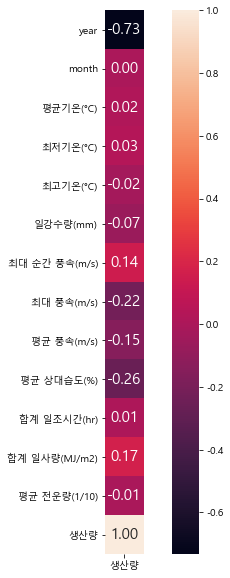

In [316]:
cols = ['year', 'month','평균기온(°C)','최저기온(°C)','최고기온(°C)','일강수량(mm)','최대 순간 풍속(m/s)','최대 풍속(m/s)','평균 풍속(m/s)','평균 상대습도(%)','합계 일조시간(hr)','합계 일사량(MJ/m2)','평균 전운량(1/10)','생산량']
plt.figure(figsize=(10,10))
hm = sns.heatmap(heat_data,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols)

### 생산량, 공급량, 수출수입, 가격의 상관관계

In [39]:
use_export = export_data.copy()
use_export[use_export['month']=='합']

,year,month,수출(중량),수출(금액),수입(중량),수입(금액)
0,2010,합,885171,4208793,13816,6428
13,2011,합,815150,4284787,12960,7725
26,2012,합,639642,3954937,3545,4183
39,2013,합,778172,3827672,7,50
52,2014,합,1045143,4283822,0,0
65,2015,합,307496,1495819,0,14
78,2016,합,165569,1123255,5,131
91,2017,합,242156,1575081,1,7
104,2018,합,244384,1510785,2,22
117,2019,합,335668,1804614,5,53


In [40]:
#수출수입 데이터 year, month
use_export = export_data.copy()
use_export = use_export.drop(export_data.index[0], axis=0)
use_export = use_export.drop(export_data.index[13], axis=0)
use_export = use_export.drop(export_data.index[26], axis=0)
use_export = use_export.drop(export_data.index[39], axis=0)
use_export = use_export.drop(export_data.index[52], axis=0)
use_export = use_export.drop(export_data.index[65], axis=0)
use_export = use_export.drop(export_data.index[78], axis=0)
use_export = use_export.drop(export_data.index[91], axis=0)
use_export = use_export.drop(export_data.index[104], axis=0)
use_export = use_export.drop(export_data.index[117], axis=0)
use_export = use_export.drop(export_data.index[130], axis=0)

#가격 데이터 year, month, day
use_price = day_price.copy()
#use_price = use_price.groupby(by = ["year", "month"], as_index=False).mean()
use_export = use_export.astype(int)
use_price = use_price.astype(int)

a = pd.merge(use_price, use_export ,how='left')

In [41]:
a.isna().sum()

year       0
month      0
day        0
date       0
price      0
수출(중량)    11
수출(금액)    11
수입(중량)    11
수입(금액)    11
dtype: int64

In [42]:
a = a.dropna()

In [43]:
#공급량 데이터 date-day
use_supply = supply_data.copy()
use_supply = use_supply.rename(columns = {'거래년월일':'date'})
use_supply['date'] = pd.to_datetime(use_supply["date"], format='%Y%m%d')
use_supply['date'] = use_supply['date'].astype(str)
use_supply['date'] = use_supply['date']+','
use_supply['year'] = use_supply["date"].str.extract("(\d{4})-", expand=True)
use_supply['month'] = use_supply["date"].str.extract("-(\d{2})-", expand=True)
use_supply['day'] = use_supply["date"].str.extract("-(\d{2}),", expand=True)
use_supply['date'] = use_supply['year']+use_supply['month']+use_supply['day']
use_supply['거래량'] = use_supply['거래량'].astype(str)
use_supply['거래량'] = use_supply['거래량'].apply(lambda x: remove_punct(x))
del use_supply['품목명']
use_supply = use_supply.astype(int)
use_supply = use_supply.groupby(by = ["year", "month", "day","date"], as_index=False).sum()
use_supply = use_supply.astype(int)

final_join_data = pd.merge(a, use_supply, how="left")
final_join_data.head(5)

,year,month,day,date,price,수출(중량),수출(금액),수입(중량),수입(금액),거래량
0,2010,1,4,20100104,1284,76921.0,428774.0,0.0,0.0,15627.0
1,2010,1,5,20100105,1292,76921.0,428774.0,0.0,0.0,11330.0
2,2010,1,6,20100106,1305,76921.0,428774.0,0.0,0.0,8554.0
3,2010,1,7,20100107,1311,76921.0,428774.0,0.0,0.0,5822.0
4,2010,1,8,20100108,1325,76921.0,428774.0,0.0,0.0,6611.0


In [44]:
final_join_data

,year,month,day,date,price,수출(중량),수출(금액),수입(중량),수입(금액),거래량
0,2010,1,4,20100104,1284,76921.0,428774.0,0.0,0.0,15627.0
1,2010,1,5,20100105,1292,76921.0,428774.0,0.0,0.0,11330.0
2,2010,1,6,20100106,1305,76921.0,428774.0,0.0,0.0,8554.0
3,2010,1,7,20100107,1311,76921.0,428774.0,0.0,0.0,5822.0
4,2010,1,8,20100108,1325,76921.0,428774.0,0.0,0.0,6611.0
...,...,...,...,...,...,...,...,...,...,...
2668,2020,10,26,20201026,3048,35177.0,213067.0,0.0,0.0,15335.0
2669,2020,10,27,20201027,3083,35177.0,213067.0,0.0,0.0,11059.0
2670,2020,10,28,20201028,3081,35177.0,213067.0,0.0,0.0,11058.0
2671,2020,10,29,20201029,3134,35177.0,213067.0,0.0,0.0,9119.0


In [45]:
final_join_data.isna().sum()

year       0
month      0
day        0
date       0
price      0
수출(중량)     0
수출(금액)     0
수입(중량)     0
수입(금액)     0
거래량       46
dtype: int64

In [46]:
final_join_data = final_join_data.dropna()

In [47]:
heat_data = pd.DataFrame(final_join_data.iloc[:,4:].corr(method = 'pearson')['price'])

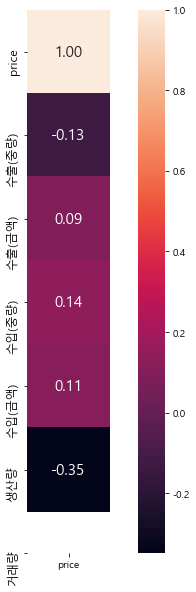

In [48]:
cols = ['price','수출(중량)','수출(금액)','수입(중량)','수입(금액)','생산량','거래량']
plt.figure(figsize=(10,10))
plt.yticks(fontsize=12, rotation=45)
#sns.set(font_scale = 1.7)
hm = sns.heatmap(heat_data,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols)

#### 가격은 생산량과 상관관계를 보인다

### 날씨와 가격의 상관관계

In [49]:
use_temp = temp.copy()

use_temp['일시'] = use_temp['일시']+','
use_temp['year'] = use_temp["일시"].str.extract("(\d{4})-", expand=True)
use_temp['month'] = use_temp["일시"].str.extract("-(\d{2})-", expand=True)
use_temp['day'] = use_temp["일시"].str.extract("-(\d{2}),", expand=True)
use_temp['date'] = use_temp['year']+use_temp['month']+use_temp['day']
del use_temp['year']
del use_temp['month']
del use_temp['day']

use_temp['date'] = use_temp['date'].astype(str)

#합치기
temp_price = pd.merge(day_price, use_temp, how = 'left', on = 'date')
temp_price = temp_price.rename(columns = {'price':'avgPrice'})

In [50]:
temp_price.isna().sum()

year             0
month            0
day              0
date             0
avgPrice         0
지점               4
지점명              4
일시               4
평균기온(°C)         4
최저기온(°C)         4
최고기온(°C)         4
일강수량(mm)         4
최대 순간 풍속(m/s)    4
최대 풍속(m/s)       4
평균 풍속(m/s)       4
평균 상대습도(%)       4
합계 일조시간(hr)      4
합계 일사량(MJ/m2)    4
평균 전운량(1/10)     4
dtype: int64

In [51]:
temp_price = temp_price.dropna()

In [52]:
temp_price = temp_price.drop(['date'], axis=1)

del temp_price['일시']
del temp_price['지점명']
del temp_price['지점']

temp_price = temp_price.astype(int)

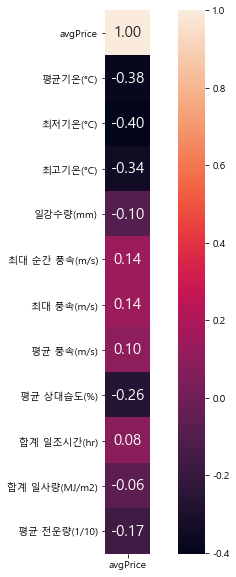

In [53]:
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

cols = ['avgPrice','평균기온(°C)','최저기온(°C)','최고기온(°C)','일강수량(mm)','최대 순간 풍속(m/s)','최대 풍속(m/s)','평균 풍속(m/s)','평균 상대습도(%)','합계 일조시간(hr)','합계 일사량(MJ/m2)','평균 전운량(1/10)']
cm = pd.DataFrame(temp_price.iloc[:,3:].corr(method = 'pearson')['avgPrice'])
plt.figure(figsize=(10,10))
#sns.set(font_scale = 1.7)
hm = sns.heatmap(cm,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols)

# Prophet

### 단감은 1,2,3,4,10,11,12 에만 판매

In [54]:
use_price = day_price.copy()
use_price.head(3)

,year,month,day,date,price
0,2010,01,04,20100104,1284
1,2010,01,05,20100105,1292
2,2010,01,06,20100106,1305


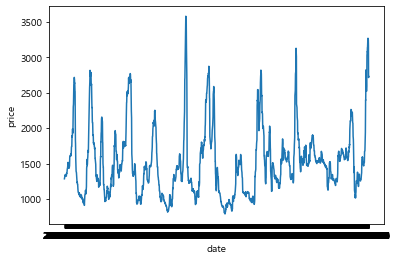

In [55]:
sns.lineplot(data = use_price, x='date', y='price')

In [56]:
use_price['date'] = pd.to_datetime(use_price['date'])

In [57]:
use_price = use_price[['date', 'price']].reset_index(drop=True)

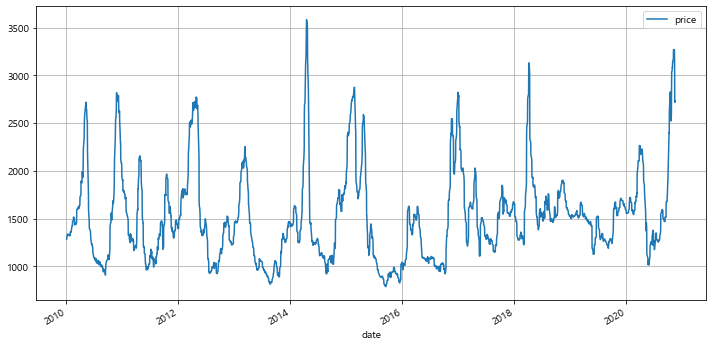

In [58]:
use_price.plot(x='date', y='price', kind="line", figsize=(12,6), grid=True)

In [59]:
use_price = use_price.rename(columns={'date':'ds', 'price':'y'})

In [60]:
m = Prophet()
m.fit(use_price)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [62]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [63]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3044,2021-11-12,1768.945229,1551.467951,2519.275024,1669.620258,1859.737126,256.866480,256.866480,256.866480,37.029762,37.029762,37.029762,219.836718,219.836718,219.836718,0.0,0.0,0.0,2025.811710
3045,2021-11-13,1769.125159,1468.158023,2373.808568,1669.438832,1860.200423,128.656382,128.656382,128.656382,-92.729271,-92.729271,-92.729271,221.385654,221.385654,221.385654,0.0,0.0,0.0,1897.781542
3046,2021-11-14,1769.305089,1425.720285,2343.507953,1669.066917,1860.663720,129.361676,129.361676,129.361676,-92.729270,-92.729270,-92.729270,222.090947,222.090947,222.090947,0.0,0.0,0.0,1898.666765
3047,2021-11-15,1769.485019,1555.588159,2520.780752,1668.820754,1861.127017,258.703238,258.703238,258.703238,36.762928,36.762928,36.762928,221.940310,221.940310,221.940310,0.0,0.0,0.0,2028.188257
3048,2021-11-16,1769.664949,1538.813417,2469.970463,1668.499477,1861.590314,257.112333,257.112333,257.112333,36.181866,36.181866,36.181866,220.930467,220.930467,220.930467,0.0,0.0,0.0,2026.777282


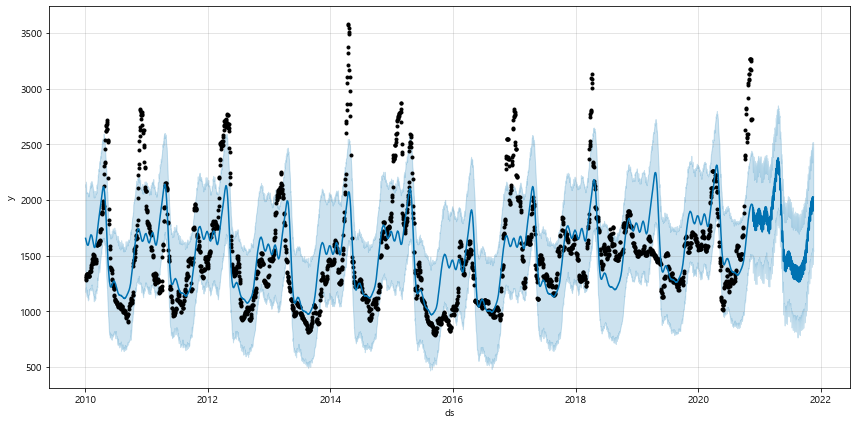

In [64]:
fig1 = m.plot(forecast, figsize=(12,6))

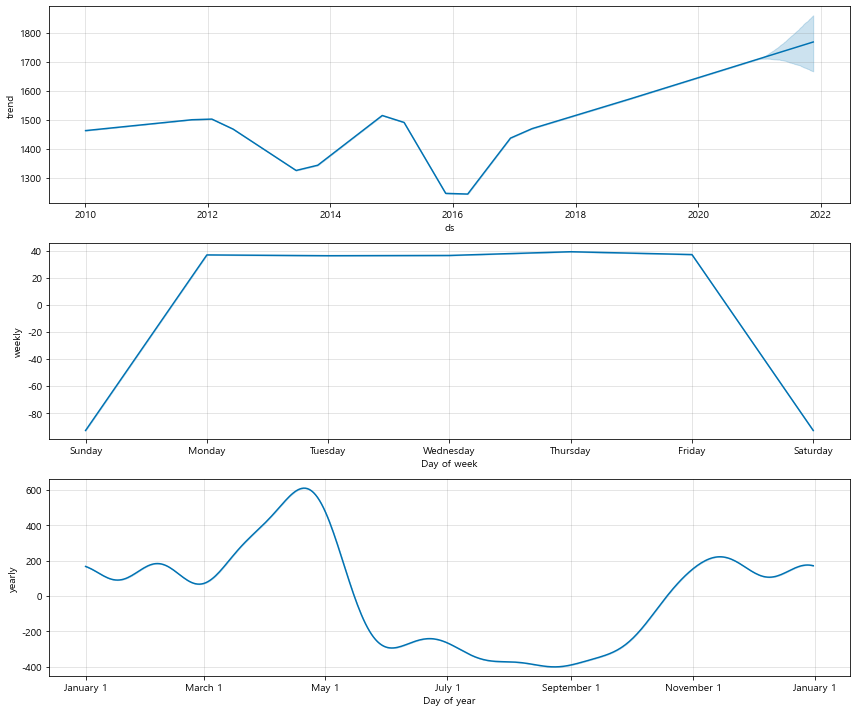

In [65]:
fig2 = m.plot_components(forecast, figsize=(12,10))